          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

C:\Users\USER\AppData\Local\Temp\ipykernel_6556\3019554870.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())


               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

C:\Users\USER\AppData\Local\Temp\ipykernel_6556\3019554870.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


0        2021-10-25 00:01:00
1        2021-10-25 00:02:00
2        2021-10-25 00:03:00
3        2021-10-25 00:04:00
4        2021-10-25 00:05:00
                 ...        
525595   2022-10-24 23:56:00
525596   2022-10-24 23:57:00
525597   2022-10-24 23:58:00
525598   2022-10-24 23:59:00
525599   2022-10-25 00:00:00
Name: Timestamp, Length: 516349, dtype: datetime64[ns]


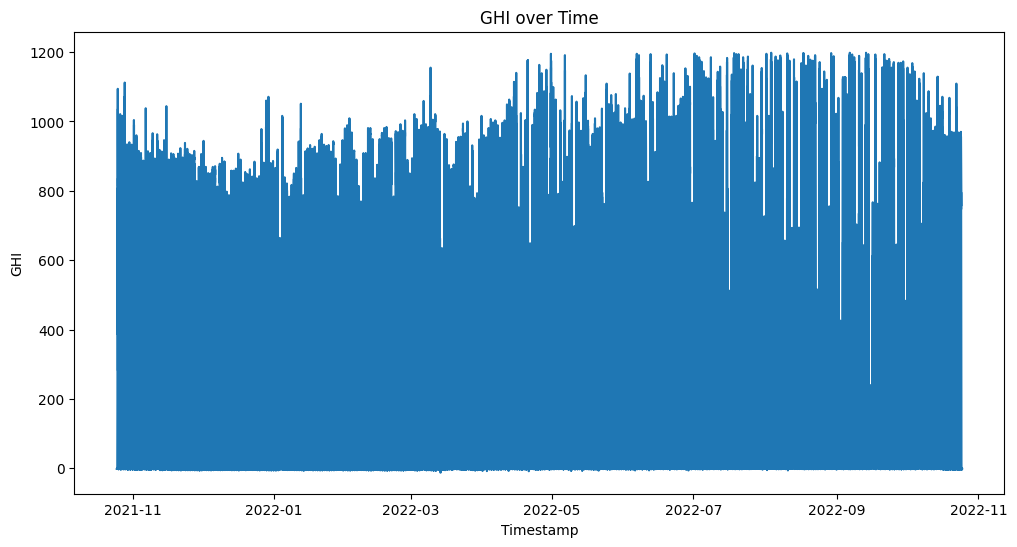

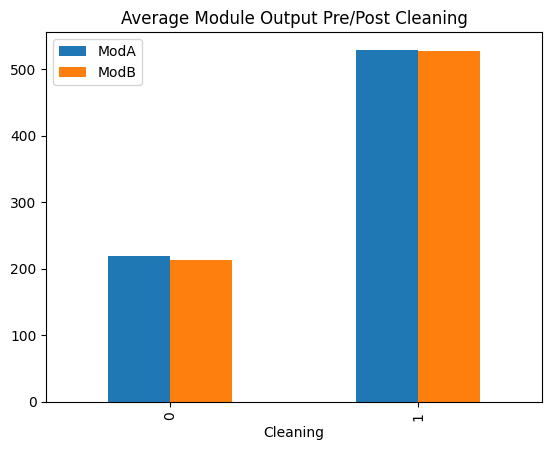

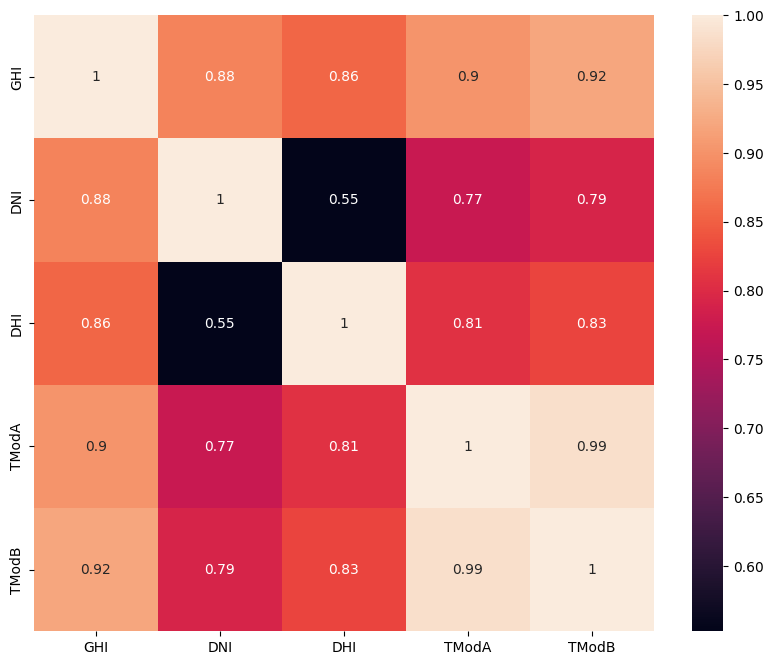

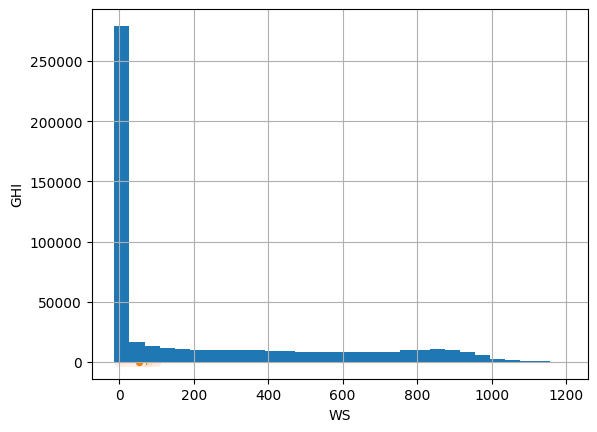

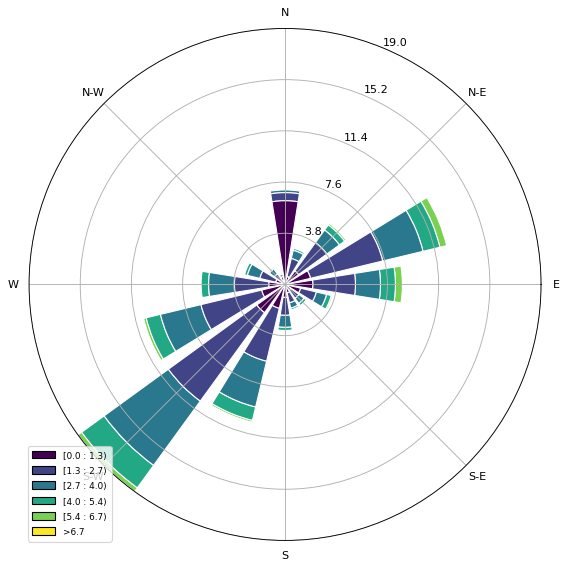

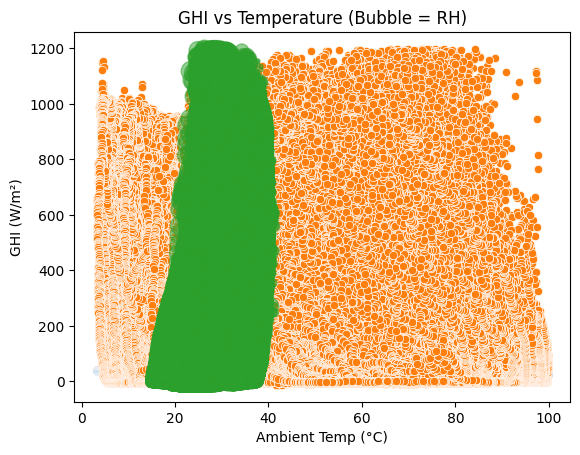

OSError: Cannot save file into a non-existent directory: 'data'

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
df = pd.read_csv("../data/togo-dapaong_qc.csv")
print(df.head())
print(df.info())
df.describe()           # Summary stats for numeric columns
df.isna().sum()         # Count missing values per column
missing_cols = df.isna().sum()[df.isna().sum()/len(df) > 0.05]  # Columns >5% null
print(missing_cols)

numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers = (z_scores > 3).any(axis=1)
df_clean = df[~outliers]  # Remove outliers
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())
print(df_clean)
print(df_clean[numeric_cols] )
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
print(df_clean['Timestamp'])


plt.figure(figsize=(12,6))
sns.lineplot(x='Timestamp', y='GHI', data=df_clean)
plt.title("GHI over Time")
plt.show()
df_clean.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar')
plt.title("Average Module Output Pre/Post Cleaning")
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True)
plt.show()
sns.scatterplot(x='WS', y='GHI', data=df_clean)
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
df_clean['GHI'].hist(bins=30)
plt.show()
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH']*2, alpha=0.5)
plt.xlabel("Ambient Temp (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble = RH)")
plt.show()
df_clean.to_csv("data/togo-dapaong_qc.csv", index=False)
